In [1]:
import os
import numpy as np
import pandas as pd
import pyswarm
import scipy.stats as sps

import p2pspatial
import pulse2percept.implants as p2pi

import sklearn.base as sklb
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-01-30 13:18:57,256 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
subject_params = {
    '12-005': {
        'implant_type': p2pi.ArgusII,
        'implant_x': -1344.36597,
        'implant_y': 537.7463881,  # or should this be minus?
        'implant_rot': -0.664813628,
        'loc_od_x': 15.5,
        'loc_od_y': 1.2
    },
    '51-009': {
        'implant_type': p2pi.ArgusII,
        'implant_x': 398.514982,
        'implant_y': -540.8417613,
        'implant_rot': -0.526951314,
        'loc_od_x': 14.8,
        'loc_od_y': 4.7
    },
    '52-001': {
        'implant_type': p2pi.ArgusII,
        'implant_x': -1147.132944,
        'implant_y': -369.1922119,
        'implant_rot': -0.342307766,
        'loc_od_x': 14.9,
        'loc_od_y': 4.3
    }
}

In [57]:
def plot_eccentricity(subject, y):
    implant = p2pi.ArgusII(x_center=implant_setup['implant_x'], 
                           y_center=implant_setup['implant_y'],
                           rot=implant_setup['implant_rot'])
    ecc = [np.sqrt(implant[row['electrode']].x_center ** 2 + implant[row['electrode']].y_center ** 2)
           for _, row in y.iterrows()]
    ecc = np.array(ecc).reshape(-1, 1)
    params = ['area', 'major_axis_length', 'minor_axis_length', 'orientation']
    fig, axes = plt.subplots(ncols=len(params), figsize=(14, 3), sharex=True, squeeze=True)
    for param, ax in zip(params, axes):
        var = np.array(y[param]).reshape(-1, 1)
        if param == 'orientation':
            # Special treatment
            param += ' (deg)'
            var = np.rad2deg(var)
            ymin = -180
            ymax = 180
            ax.set_yticks(np.linspace(ymin, ymax, 5))
        else:
            ymin = 0
            ymax = np.max(var)
            scale = 0.5 * 10 ** np.ceil(np.log10(ymax))
            ymax = np.ceil(ymax / scale) * scale
        ax.scatter(ecc, var, edgecolors='k')
        ax.set_xlabel('eccentricity (um)')
        ax.set_ylabel(param)
        linreg = LinearRegression()
        linreg.fit(ecc, var)
        ax.plot(ecc, linreg.predict(ecc), 'k')
        ax.set_xlim(-500, 4500)
        ax.set_ylim(ymin, ymax)
        pearsonr = sps.pearsonr(ecc, var)
        ax.text(0, ymax, '$r=$%.3f, $p<$%.2e' % (pearsonr[0], pearsonr[1]), 
                ha='left', va='top', fontsize=10)
    fig.suptitle('Subject ' + subject, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.9])

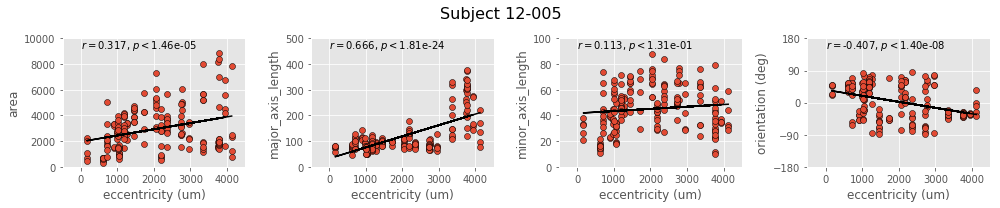

In [58]:
subject = '12-005'
implant_setup = subject_params[subject]
X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape', subject), 
                            amplitude=2.0, single_stim=True)
y.loc[:, 'electrode'] = ['%s%d' % (row['electrode'][0], int(row['electrode'][1:])) for _, row in y.iterrows()]
y_grouped = y.groupby('electrode', as_index=False).mean()
plot_eccentricity(subject, y)

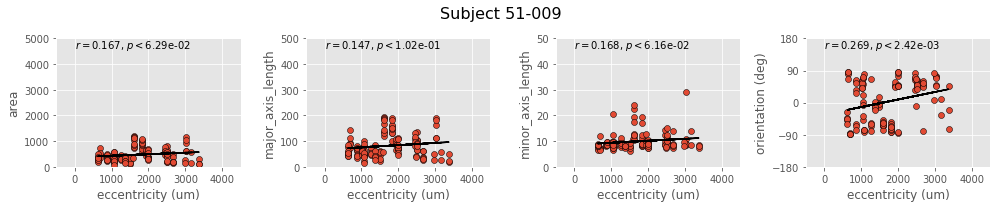

In [59]:
subject = '51-009'
implant_setup = subject_params[subject]
X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape', subject), 
                            amplitude=2.0, single_stim=True)
y.loc[:, 'electrode'] = ['%s%d' % (row['electrode'][0], int(row['electrode'][1:])) for _, row in y.iterrows()]
y_grouped = y.groupby('electrode', as_index=False).mean()
plot_eccentricity(subject, y)

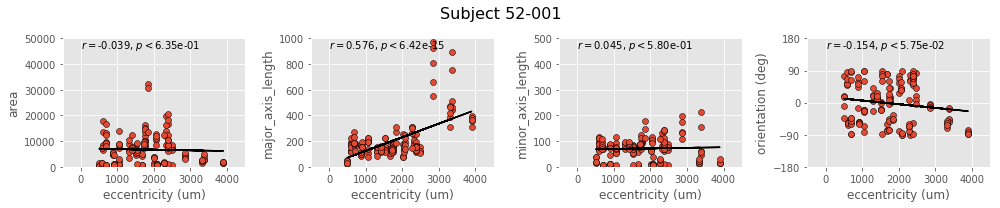

In [60]:
subject = '52-001'
implant_setup = subject_params[subject]
X, y = p2pspatial.load_data(os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape', subject), 
                            amplitude=2.0, single_stim=True)
y.loc[:, 'electrode'] = ['%s%d' % (row['electrode'][0], int(row['electrode'][1:])) for _, row in y.iterrows()]
y_grouped = y.groupby('electrode', as_index=False).mean()
plot_eccentricity(subject, y)